#### Project 2

For the purpose of this project I will be local at global warming trends via found Data from various sources and sythesised Data. I will be plotting, programming and displaying the data to me best abiilty. The project is broke into a number of sections with each containing its own references where necessary. A bibliography containing all of the relevant references formatted in the Harvard referencing style is found at the end. 

Contents  

1: Analysis of CO2 vs Temperature Anomaly from 800kyrs – present.

2: Examination of one other (paleo/modern) feature (CH4).

3: Examination of Irish context.

4: Fusing and analysing of Data with it being exported to csv and json formats

5: Analysis of the data, the trends and the relationships between them.

6: Prediction global temperature anomaly over next few decades using synthesised data and comparison of this published climate models if atmospheric CO2 trends continue.

7: Comments on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

##### 1. Analysis of CO2 vs Temperature Anomaly from 800kyrs – present

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

Section to load in Data. Not loading in the data correctly. I need to remove the headings from the data as it is loading them as headings. I need to remove four headings. Update-Headings removed and results shown.

I decided to remove the columns needed and create seperate excel files one with C02 data and ages and one with Temp Data.

In [168]:
df = pd.read_excel('C02 Data.xlsx')
df.head()

,Ice Core Gas Age,CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


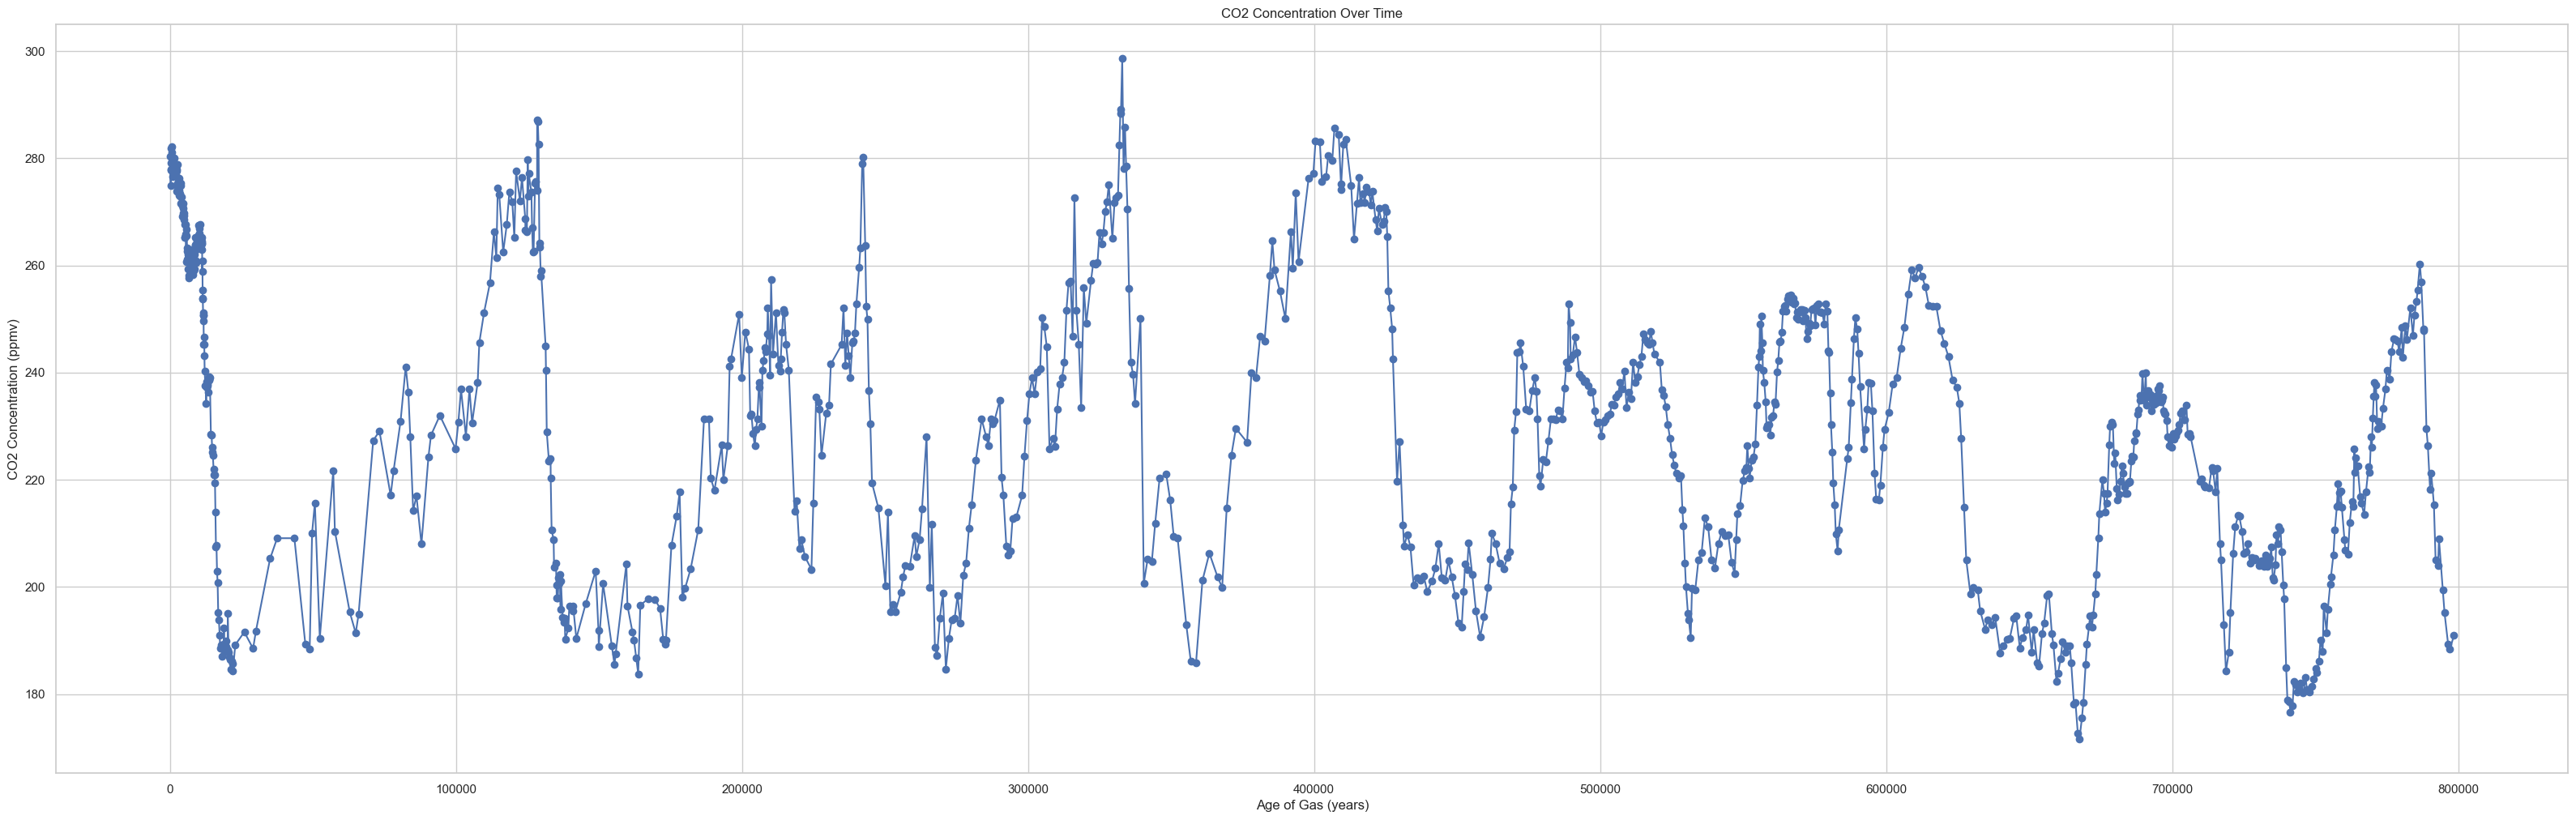

In [169]:
plt.figure(figsize=(40, 12))
plt.plot(df['Ice Core Gas Age'], df['CO2 (ppmv)'], marker='o', linestyle='-')
plt.xlabel('Age of Gas (years)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time')
plt.grid(True)
plt.show()

As the project progressed, I faced a number of issues in my lack of experience data cleaning. One of these was the fatc that the 'Temp Age' column was in float form and not in integer. With this I began to consider ways to convert the data. A way I had touched upon before was the '.astype' function of Pandas. I then applied this to the Data to rectify the issues. The data became easier to work with following this. 

Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel('Temp Data.xlsx')
df.head()

# Convert columns to integers
df['Temp Age'] = df['Temp Age'].astype(int)

# Display the updated DataFrame
df.head()

,Temp Age,Temp
0,38,0.88
1,46,1.84
2,55,3.04
3,64,0.35
4,73,-0.42


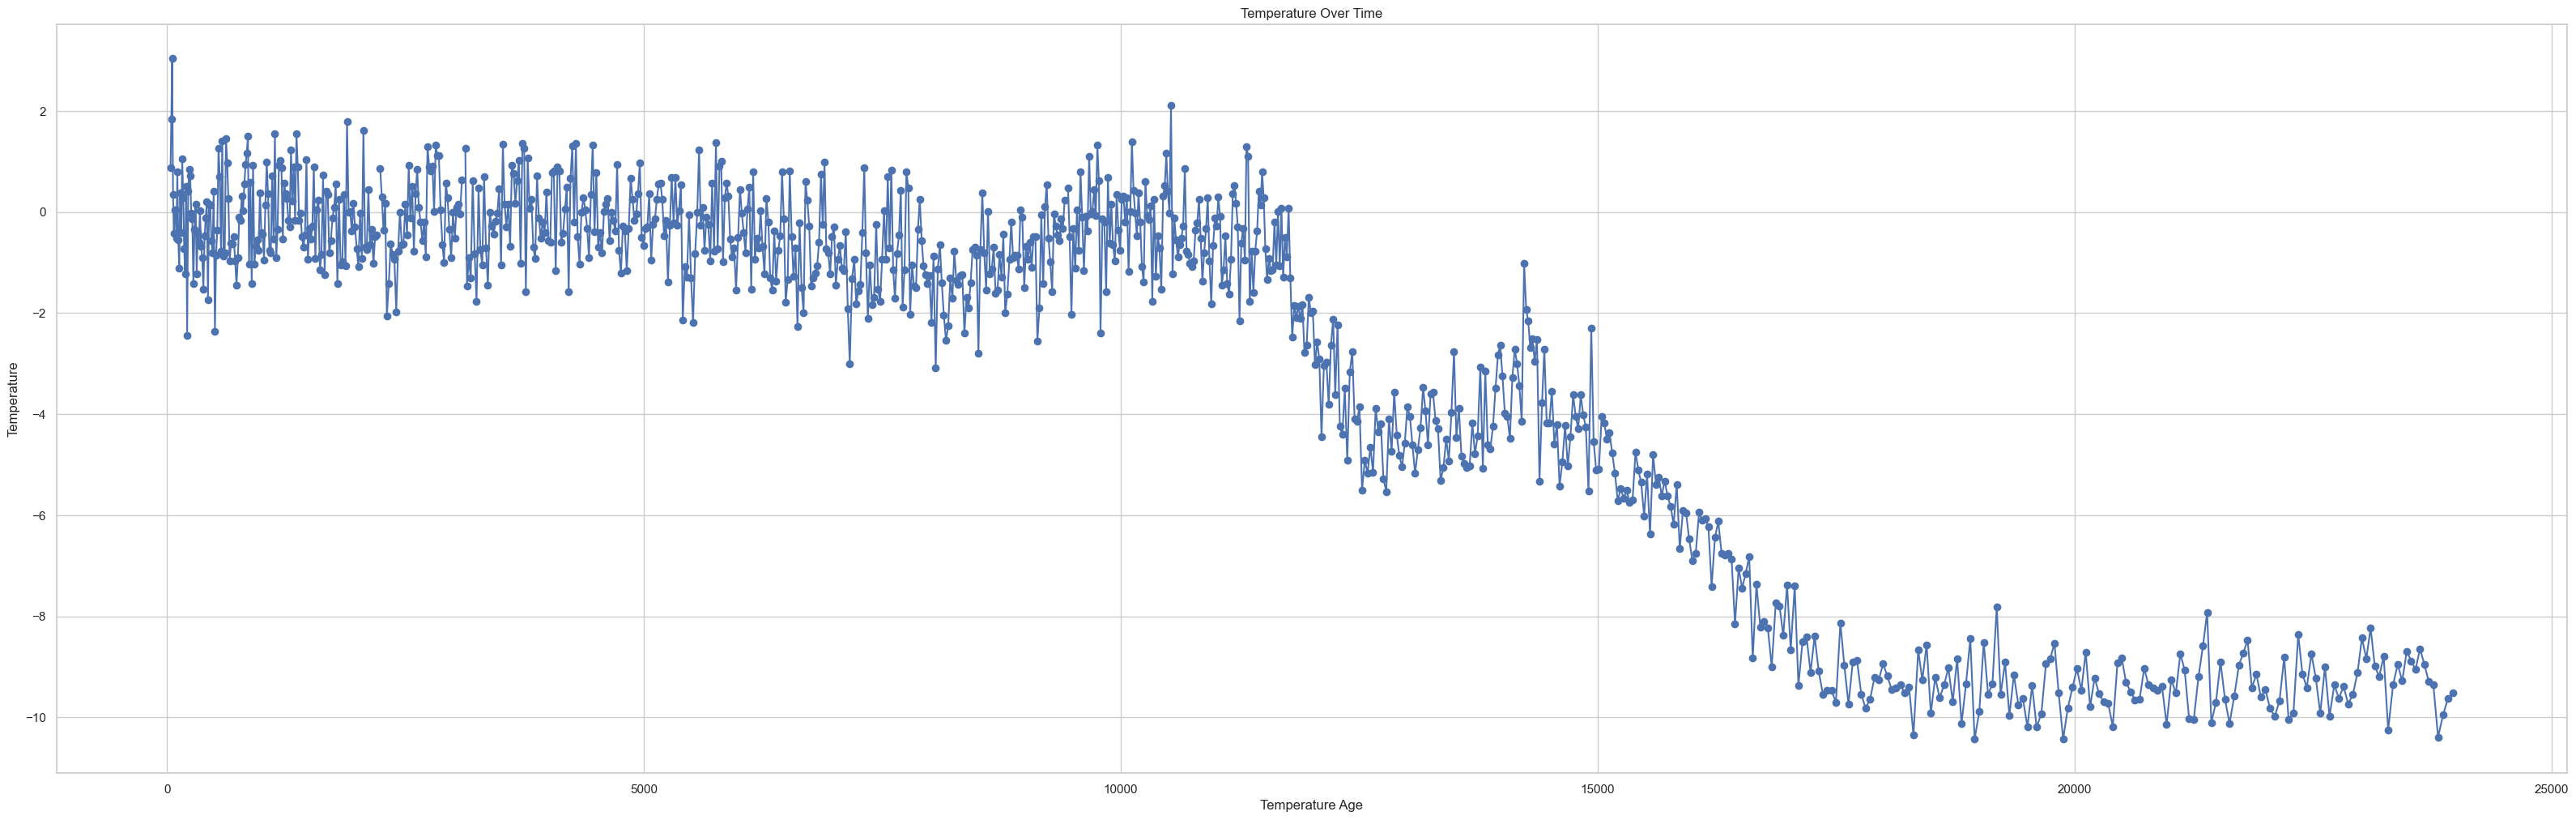

In [171]:
plt.figure(figsize=(40, 12))
plt.plot(df['Temp Age'], df['Temp'], marker='o', linestyle='-')
plt.xlabel('Temperature Age')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

Analysis of c02 vs Temperature Analysis

#### 2. Examination of one other (paleo/modern) feature (CH4)

After a number of attempts to load the data set from: https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt, I decided to try and skip the inital lines from the dataest. Before this I have tried to import it directly and python would not load the data correctly. I also tried, in a number of ways, to import the data into excel and it was putting the data into a single column and despite a number of efforts to import the data and transform it, it would not work. Finally, upon research I decided to try and use the orginal file but skip the opening introduction text until i reached the headings. Here I used 'skiprows=152' and printed the information. Once again, I had to keep going until I found the correct number (152). This so far has made the data usable. Please find the used code below, followed by the references. Much of this was also taught in the lectures throughout this course.

In [172]:
import pandas as pd

data_from_site = "https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt"

df = pd.read_fwf(data_from_site, skiprows=153, header=None)

print(df.head())

        0        1         2   3     4
0   Depth  Gas Age  CH4 mean  1s  Lab.
1   99.34       13       907  10     b
2  102.45      126       784  10     g
3  102.58      130       762  10     b
4  103.34      151       710  10     g


When initially trying to create this plot, I faced a number of issues. The foremost of these seemed to be the plots being unintelligable. I then left what I had done and began other sections of the project. I then returned to this as I wondered if I exported the data from the site to a csv would it read it more correctly and make the data more usable. This worked out as I used the following skeletons of code and previous learning to create the csv file. 

reference:

https://www.freecodecamp.org/news/dataframe-to-csv-how-to-save-pandas-dataframes-by-exporting/#:~:text=to_csv()%20Method-,The%20.,format%20for%20storing%20tabular%20data. 

https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_fwf.html

I once again imported the libraries needed for this section of code.

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

Next I imported the ch4_data from a csv file. The Data required some cleaning as the heading appeared in the first two lines of code. 

In [201]:
#Data
file= 'ch4_data.csv'
df = pd.read_csv(file)

Here the columns are defined in order to plot the data correctly. 

In [202]:
#Columns
df.columns = ['Gas Age', 'CH4 Mean']

After considering other forms of displaying the data such as a scatterplot using staggered data entries and a boxplot doing the same, I once again decided to use a plot that contains a a high number of data points to best display the data.

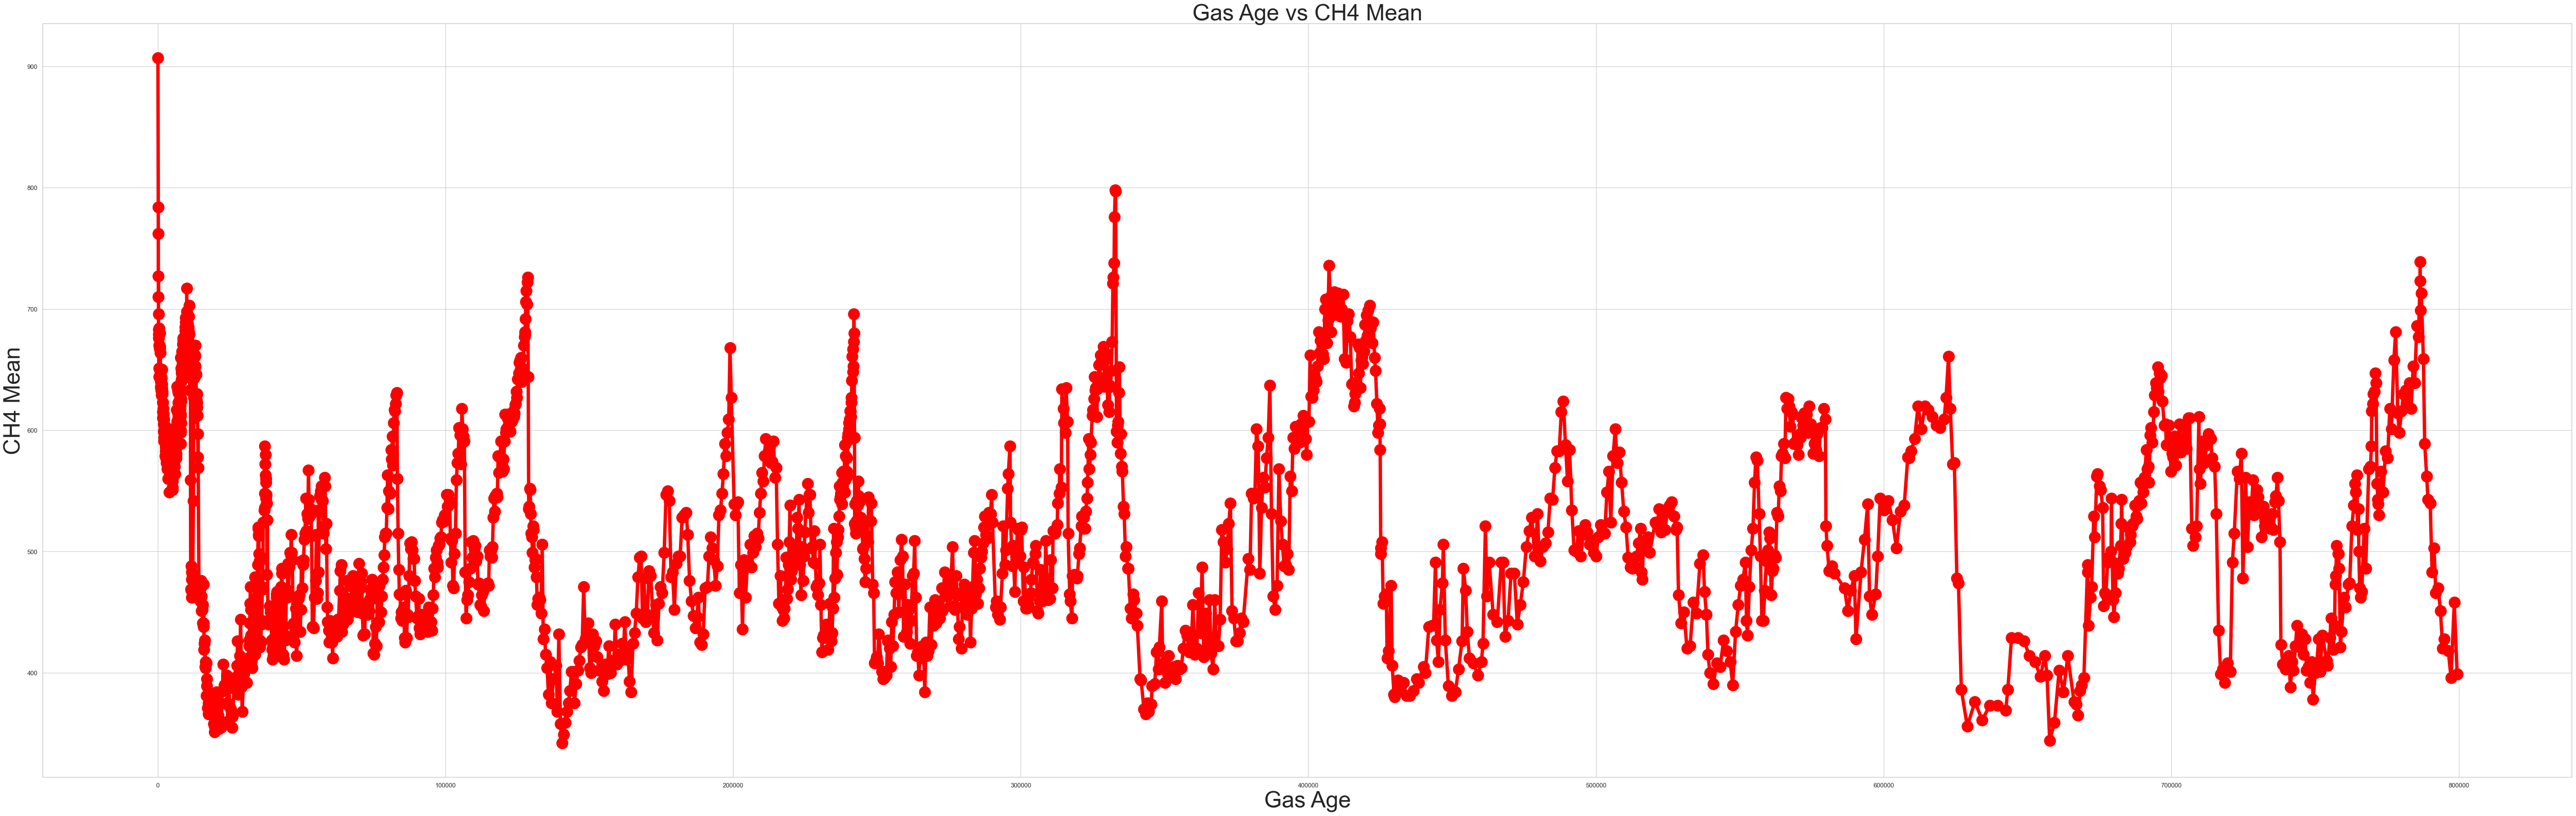

In [204]:
#Plot
plt.figure(figsize=(80, 24))
plt.plot(df['Gas Age'], df['CH4 Mean'], marker='o', markersize = 20, color='red', linestyle='-', linewidth=6)
plt.title('Gas Age vs CH4 Mean', fontsize=40)
plt.xlabel('Gas Age',fontsize=40)
plt.ylabel('CH4 Mean',fontsize=40)
plt.grid(True)
plt.show()

References: 

https://www.listendata.com/2017/02/import-data-in-python.html#:~:text=You%20don't%20need%20to,CSV%20files%20stored%20in%20URL)


https://stackoverflow.com/questions/49583256/skip-lines-in-a-text-file.&text=By%20specifying%20nrows%3D%20and%20usecols,number%20of%20rows%20and%20columns.  

#### 3: Examination of Irish context

For examining and Irish context, I took two seperate csv files, one titled 'Irish Data' which contains the irish temperature data over the past 100 or so years and 'Irish Emissions' whihc looks at c02, methane and nitrous oxide emissions over the past 100 years. The emissions data was pulled from a data set containing other countries. I cleaned the data for my purposes and the placed it together. Below are two plots, one which shows the Irish temperature anomoly and one which plots the gases. Both are shown over 121 years to show trends. 

The next section of code loads the necessary libraries and is followed a creation of a dataframe. It then displays the headings of the dataset, a practice I discovered to be vital when importing data as the column names need to be exact in order for the code to work. 

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Irish_Data.csv')
df.head()


,Irish year,Irish temp
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3


Next I added code to create information about the dataset in order to give an overview. I discuss these findings in the 'analysis' section found at the end of point 3. The first of these is 'Dataset' information:

In [ ]:
print("Dataset Info:")
print(df.info())

Next I used df.describe to get statistics on the dataset: 

In [ ]:
stats = df.describe()
print("\nSummary Statistics:")
print(stats)

I then plotted the data using a scatterplot. I used a scatterplot to show the outliers. I also followed this by creating a plot to show the data more linearly in order to compare this to the emissions data that follows these plots.

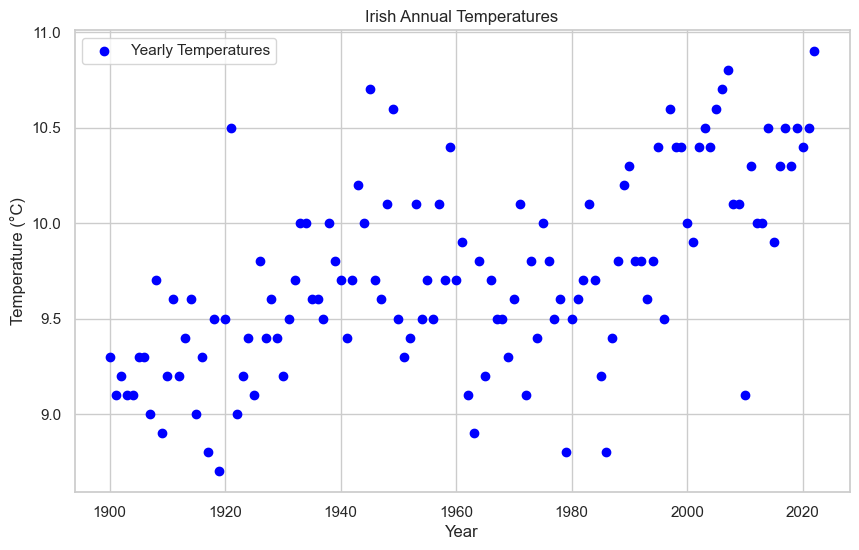

In [230]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Irish year'], df['Irish temp'], label='Yearly Temperatures', color='blue')
plt.title('Irish Annual Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


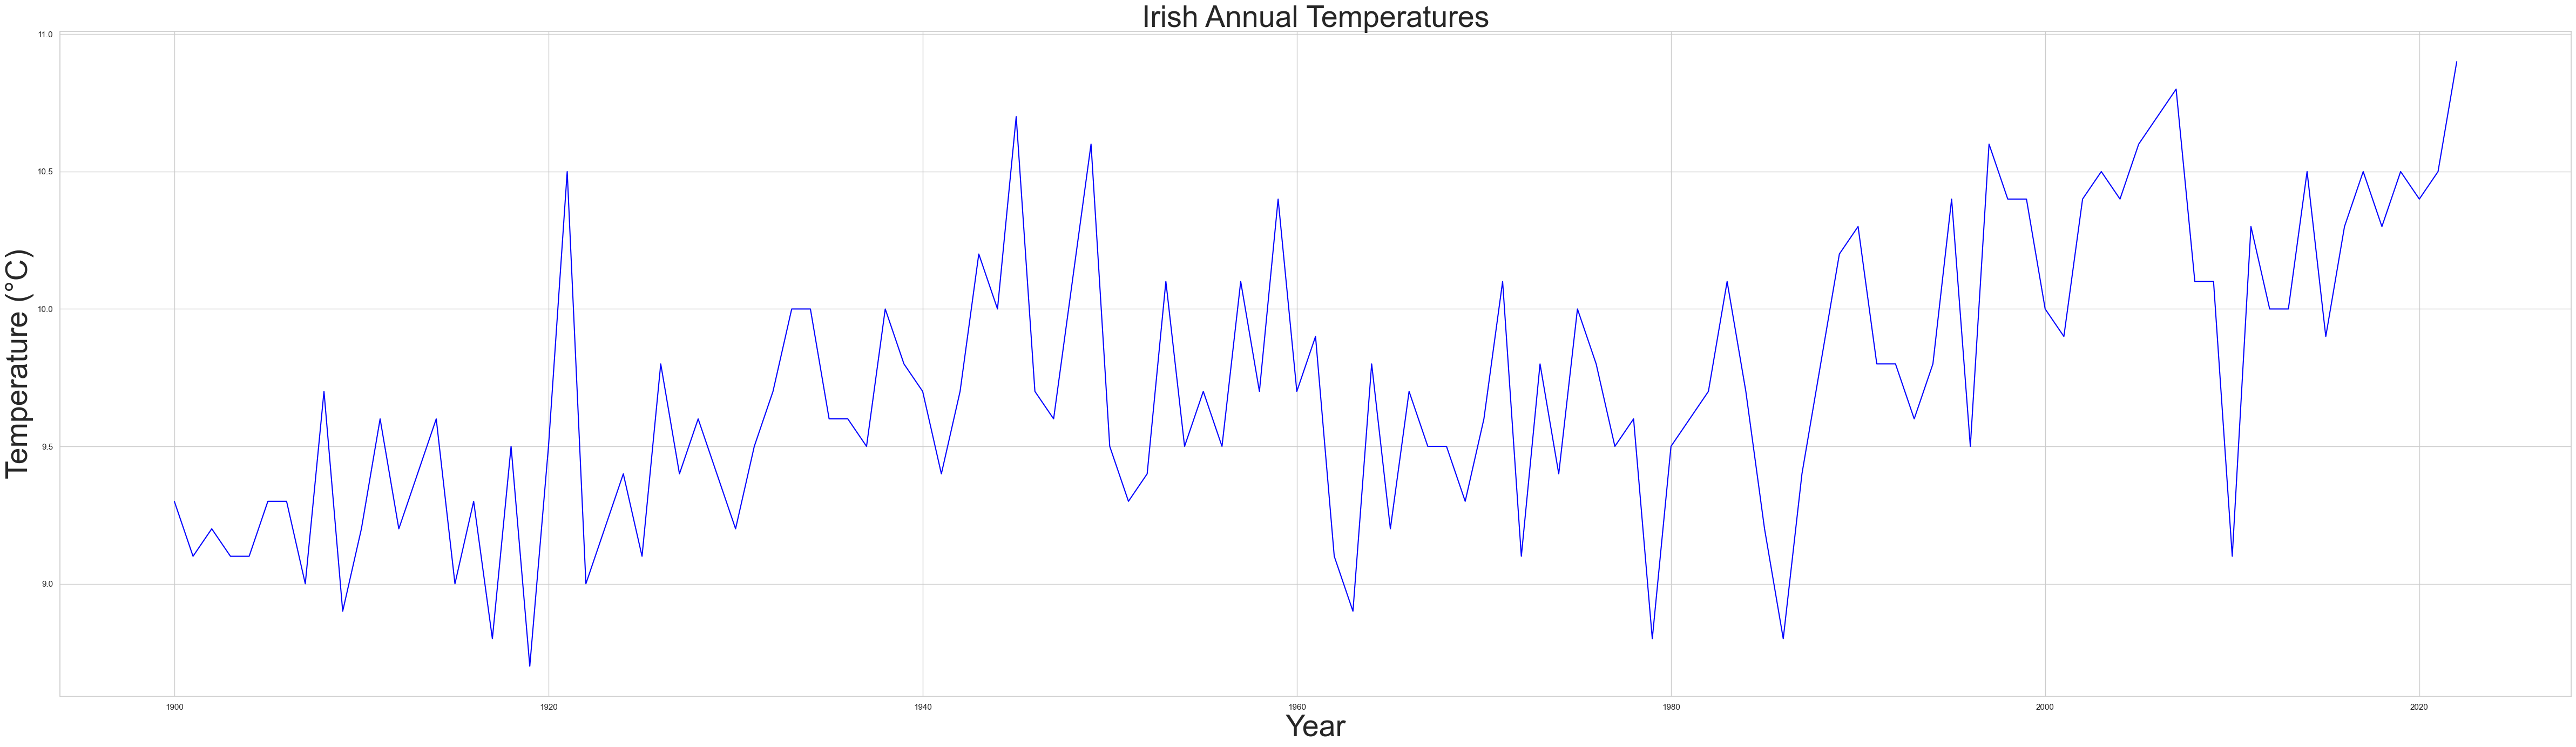

In [232]:
plt.figure(figsize=(60, 16))
plt.plot(df['Irish year'], df['Irish temp'], label='Yearly Temperatures', color='blue')
plt.title('Irish Annual Temperatures', fontsize=40)
plt.xlabel('Year',fontsize=40)
plt.ylabel('Temperature (°C)',fontsize=40)
plt.grid(True)
plt.show()

Following this I decided to ecplore the methane, c02 and nitrous oxide emissions along with the temperature anomoly in order to study, or confirm, the trends. I loaded in the data mentioned at the beginning of this session and once again displayed some of the data. 

In [215]:
df = pd.read_csv('Irish Emissions.csv')
df.head()

,Year,Nitrous oxide emissions,Annual methane emissions,Annual CO2 emissions
0,1900,1288602.0,25734202,-2112906.8
1,1901,1283737.8,25652976,-2051840.1
2,1902,1267520.2,25577564,-1856426.8
3,1903,1242784.2,25492832,-1856426.8
4,1904,1212365.1,25410988,-1514453.4


Next I examined and plotted this data using the following libraries. After doing research I found that using seaborn, using the references at the end of this section, was the best way in which to plot the data as I wanted to include all three pieces of data on the same plot to show the trends. 

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next I once again created the necessary dataframe from the csv file in order to display the data. 

In [224]:
emissions_df = pd.read_csv('Irish Emissions.csv')

I then plotted the information, exactly like the temperature data, to get an overview of the data. This is analyse at the end of this section: 

In [239]:
print("Dataset Info:")
print(emissions_df.info())

stats = emissions_df.describe()
print("\nSummary Statistics:")
print(stats)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      122 non-null    int64  
 1   Nitrous oxide emissions   122 non-null    float64
 2   Annual methane emissions  122 non-null    int64  
 3   Annual CO2 emissions      122 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.9 KB
None

Summary Statistics:
              Year  Nitrous oxide emissions  Annual methane emissions   
count   122.000000             1.220000e+02              1.220000e+02  \
mean   1960.500000             5.319861e+06              1.839779e+07   
std      35.362409             3.404528e+06              3.872418e+06   
min    1900.000000             1.069263e+06              1.201356e+07   
25%    1930.250000             1.333742e+06              1.543537e+07   
50%    1960.500000             5.64705

Following this, based on the code from the last reference given, I created the seaborn lineplots. First the code sets the seaborn style:

In [225]:
sns.set(style="whitegrid")

Next the lineplots are created with each variable of data being used across the same timeline in order to plot the trends. 

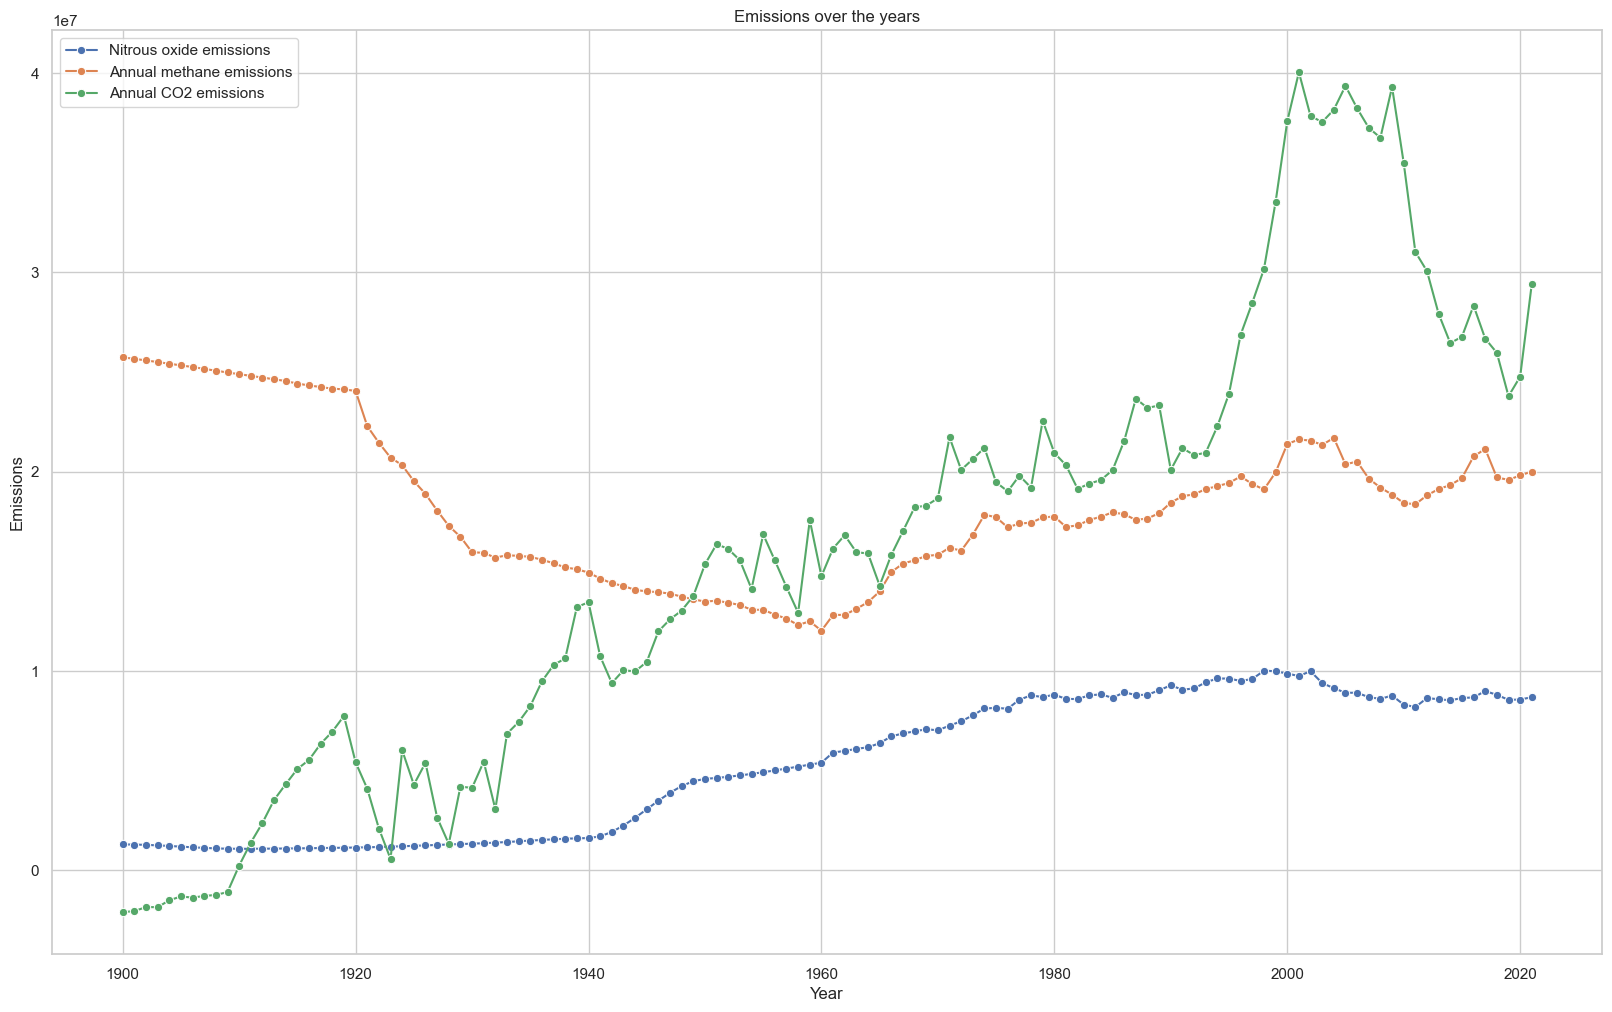

In [227]:
plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Nitrous oxide emissions', data=emissions_df, marker='o', label='Nitrous oxide emissions')
sns.lineplot(x='Year', y='Annual methane emissions', data=emissions_df, marker='o', label='Annual methane emissions')
sns.lineplot(x='Year', y='Annual CO2 emissions', data=emissions_df, marker='o', label='Annual CO2 emissions')

plt.title('Emissions over the years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

Analysis

When analysing the data there are a number of interesting facts to discuss.

Temperature
The temperatures range is from 8.7 to 10.9 degrees with a fluctuation in temperatures over the years. Also the temperature has generally been above 9 degrees in recent decades,and has been rising, despite a number of fluctuations and outlier.

Emissions
The analysis of the emissions data shows trends in nitrous oxide, methane, and carbon dioxide emissions. Nitrous oxide emissions shows an overall increasing trend with some fluctuations. It spikes around the 1970s and continues spiking until the 1990s. In contrast, annual methane emissions shows a more consistent growth without sharp, showing a steady rise over the years. Carbon dioxide emissions show a continuous increase. This data coincides with the rise in temperature.

References used: https://repository.library.noaa.gov/view/noaa/48993/noaa_48993_DS1.pdf

https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647

https://stackoverflow.com/questions/22483588/how-to-plot-multiple-dataframes-in-subplots#:~:text=You%20can%20manually%20create%20the,plt%20fig%2C%20axes%20%3D%20plt.

https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial 



#### 4: Fusing and analysing of Data with it being exported to csv and json formats

Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats


In [179]:
import pandas as pd

Loading Data

In [180]:
#Import Data
co2_data = pd.read_excel('C02 Data.xlsx')
temp_data = pd.read_excel('Temp Data.xlsx')
ch4_data = pd.read_csv('ch4_data.csv')
irish_data = pd.read_csv('Irish_Data.csv')

To merge the Data after a number of various attempts and problems to overcome regarding the column names, I ended up finding that I needed to merge the Data based on their indexes using 'pd.concat'. The merged Dataset was then sent to a 

In [181]:
#Convert Temp Age to Int
temp_data['Temp Age'] = temp_data['Temp Age'].astype(int)

#Merge datasets based on index
merged_df = pd.concat([co2_data, temp_data, ch4_data, irish_data], axis=1)

#CSV
merged_df.to_csv('merged_data.csv', index=False)

#JSON
merged_df.to_json('merged_data.json', orient='records')


In [182]:
merged_df.describe()

,Ice Core Gas Age,CO2 (ppmv),Temp Age,Temp,Irish year,Irish temp
count,1096.000000,1096.000000,987.000000,984.000000,123.000000,123.000000
mean,390905.979015,230.835675,9446.446809,-2.522012,1961.000000,9.728455
std,262092.947239,27.573616,6477.617525,3.456009,35.651087,0.503678
min,137.000000,171.600000,38.000000,-10.430000,1900.000000,8.700000
25%,137133.500000,207.500000,3890.000000,-4.440000,1930.500000,9.400000
50%,423206.500000,231.450000,8852.000000,-0.955000,1961.000000,9.700000
75%,627408.000000,251.525000,14040.000000,-0.107500,1991.500000,10.100000
max,798512.000000,298.600000,23965.000000,3.040000,2022.000000,10.900000


Analysis of fused dataframe


CO2 (ppmv): Mean CO2 concentration is approximately 230.84 ppmv. Standard deviation is around 27.57, showing some variability in the Data.Minimum CO2 concentration is 171.6 ppmv, and the maximum is 298.6 ppmv.


Temp: Mean temperature is approximately -2.52°C. Standard deviation is about 3.46. Minimum temperature is -10.43°C, and the maximum is 3.04°C.

CH4 mean: There are 123 non-null entries in this column.
Mean CH4 concentration is not provided in the summary, but it is likely the average value of CH4.
year:

Irish Data: This column appears to represent the year. The data spans from 1900 to 2022. Mean temperature is approximately 9.73°C.

References: 

https://www.w3schools.com/python/pandas/ref_df_merge.asp 

https://pandas.pydata.org/docs/user_guide/merging.html

https://edcarp.github.io/python-intermediate-esces/06-merging-data/index.html 

https://stackoverflow.com/questions/72192394/how-to-export-very-large-merged-dataframe 

https://datacarpentry.org/python-ecology-lesson/05-merging-data.html

https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html

#### Bullet point 5

#### 5: Analysis of the data, the trends and the relationships between them.

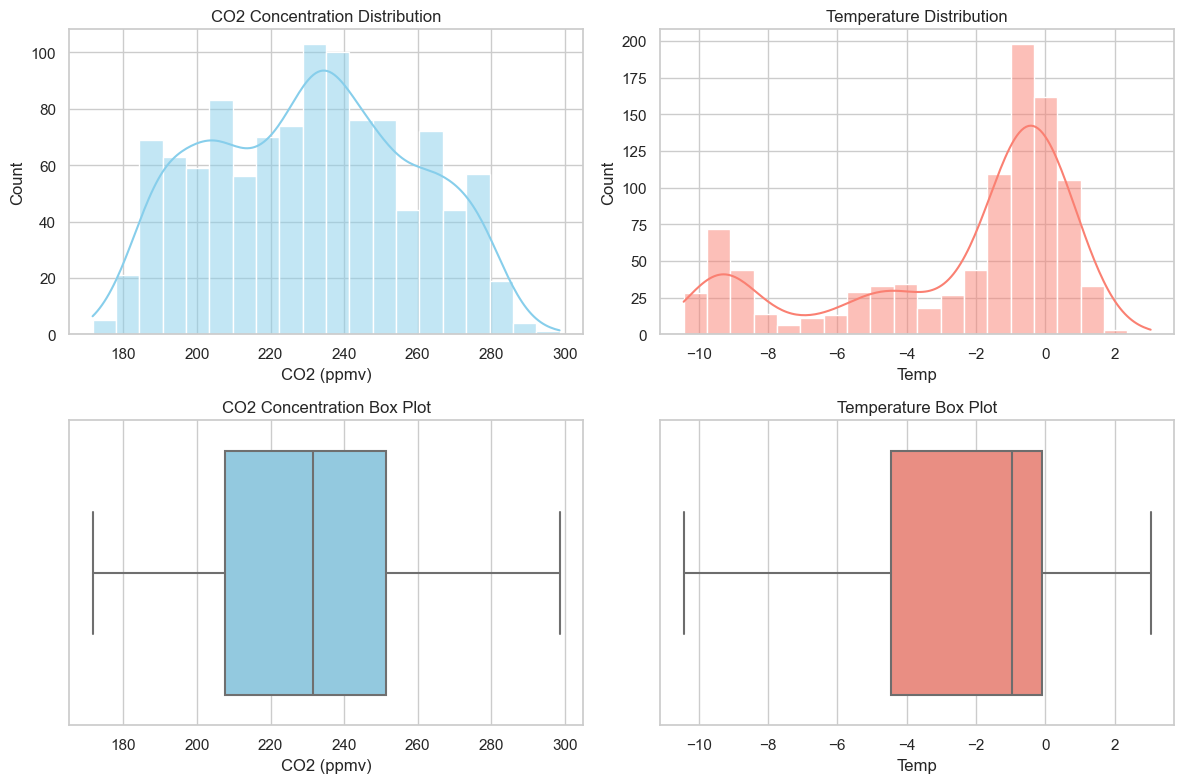

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

#Histogram
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(merged_df['CO2 (ppmv)'], bins=20, kde=True, color='skyblue')
plt.title('CO2 Concentration Distribution')

plt.subplot(2, 2, 2)
sns.histplot(merged_df['Temp'], bins=20, kde=True, color='salmon')
plt.title('Temperature Distribution')

#Box Plots
plt.subplot(2, 2, 3)
sns.boxplot(x=merged_df['CO2 (ppmv)'], color='skyblue')
plt.title('CO2 Concentration Box Plot')

plt.subplot(2, 2, 4)
sns.boxplot(x=merged_df['Temp'], color='salmon')
plt.title('Temperature Box Plot')

plt.tight_layout()
plt.show()

Below concerns the using of lag in comparing various points of th Data. Here I used the pandas function'.shift' to go to various points back in the Data to compare the Data.

In [184]:
merged_df['CO2 (ppmv) Lag'] = merged_df['CO2 (ppmv)'].shift(1)
merged_df['Temp Lag'] = merged_df['Temp'].shift(1)

I then decided to find current yearly data to create further plotting of the data and better display the correlations. Also, later in this project, the need for synthesising data arises. I considered the best way to do this would be to create a more modern scale of about fifty years to coincide with the rise in industrialisation and carbon emissions as a results.

c02 dataset: https://gml.noaa.gov/ccgg/trends/data.html


References used: 

https://www.w3schools.com/python/pandas/ref_df_merge.asp 

https://pandas.pydata.org/docs/user_guide/merging.html

https://edcarp.github.io/python-intermediate-esces/06-merging-data/index.html 

https://stackoverflow.com/questions/72192394/how-to-export-very-large-merged-dataframe 

https://datacarpentry.org/python-ecology-lesson/05-merging-data.html

https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html

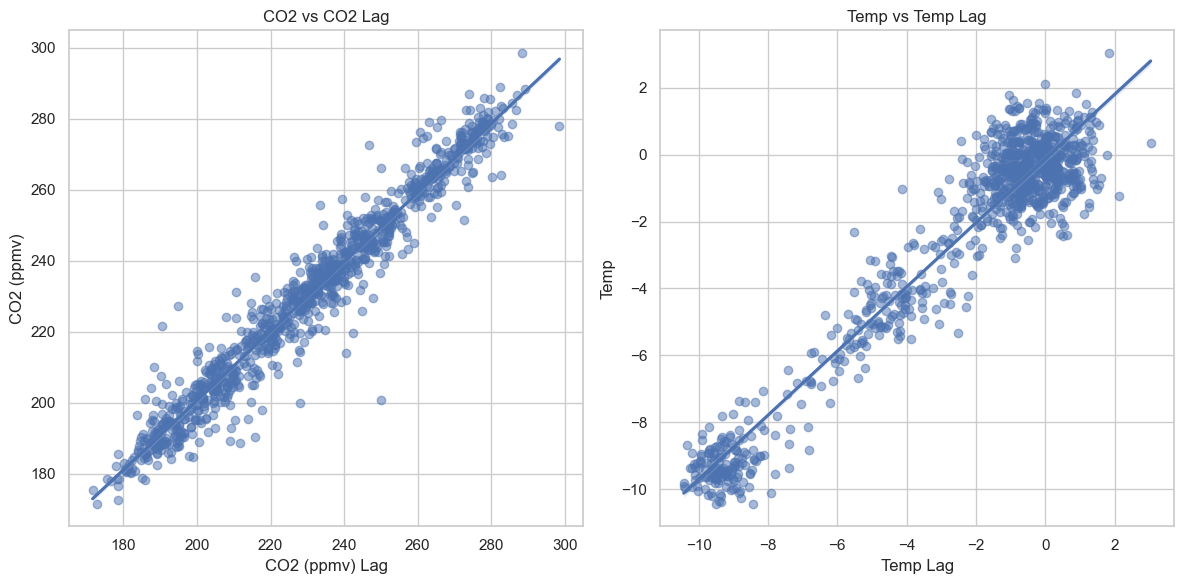

In [185]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='CO2 (ppmv) Lag', y='CO2 (ppmv)', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('CO2 vs CO2 Lag')

plt.subplot(1, 2, 2)
sns.regplot(x='Temp Lag', y='Temp', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('Temp vs Temp Lag')

plt.tight_layout()
plt.show()


Analysis: 

Both show a positive slope meaning both are rising over time. When using varied lags the slope always remains positive.

Next shows a table of correlations of the data presented. The code worked earlier but the Gas Age data reverted back to before I changed it.  I believe if I could skip the first row the data would appear greater but time contstraints have hindered my doing so. I will do further research on this.

references: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.

https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

https://chem.libretexts.org/Courses/Lumen_Learning/Book%3A_Microeconomics-1_(Lumen)/03%3A_1-_Economic_Thinking/3.08%3A_Reading-_Interpreting_Slope

#### 6: Prediction global temperature anomaly over next few decades using synthesised data and comparison of this published climate models if atmospheric CO2 trends continue.


Plotting Linear Regression

To first complete this section of the code I need to create a programme which computes the linear regression of the real life data used throughout this project. The following code was synthesised from the references/lecture material. The references were found throughout the code. 

Libraries used:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

importing dataframes from co2 data and temp data.

In [ ]:
#CO2 
CO2_df = pd.read_excel('C02 Data.xlsx')

#Temp
temp_df = pd.read_excel('Temp Data.xlsx')

When creating this code there was consistant issues. One of the most prominant, besides further column name difficlulties, was the temperature data. After much consideriation and troubleshooting, It appeared it was due to the fact that temp age was in float form and not integer which does not work for and linear regression. I use '.astype(in)', a code I used a number of times before in my programming module last year to rectify the type. 

In [ ]:
#Temp Age to int
temp_df['Temp Age'] = temp_df['Temp Age'].astype(int)

Here, based on previous code used in the project to fuse and create a file, I created this section to do the ame. Again, I found issues with the column names but once they were created the code worked well. 

In [ ]:
#Merge the datasets
merged_df = pd.merge(CO2_df, temp_df, left_on='EDC3_gas_a (yr)', right_on='Temp Age', how='inner')

The code would not load in and upon several tries it was the empty values found within the merged dataset that caused the problem. The following code I had encountered accidently encountered and the '.dropna()' removed the empty values from the code which made it work. 

In [ ]:
#Get rid of rows with NaN values
merged_df = merged_df.dropna()

This next section was formed to create the linear progression that is then plotted. the first section merges the c02 data and the temp data which is then seperated in order to perform the Train_test_split command in order to create reusable data for the linear progression. Next linear progression is brought in from the scikit library as 'model' followed by model.fit estimator. Finally the predictions section using the linear regression is created.

In [ ]:
#merged Data
co2 = merged_df[['CO2 (ppmv)']]
temp = merged_df['Temp']

#Split the data into training and testing sets
co2_train, co2_test, temp_train, temp_test = train_test_split(co2, temp, test_size=0.2, random_state=1)

#linear regression model
model = LinearRegression()
model.fit(co2_train, temp_train)

#Predictions
temp_pred = model.predict(co2_test)


Skeleton to be used for code in this section: https://valueml.com/global-warming-prediction-using-machine-learning-in-python/

References: 

https://www.machinelearningnuggets.com/python-linear-regression/#models-provided-by-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.machinelearningnuggets.com/python-linear-regression/#models-provided-by-scikit-learn

https://pandas.pydata.org/docs/user_guide/merging.html

https://datatofish.com/dropna/

Plotting of Data

In [ ]:
#Plot
plt.figure(figsize=(10, 6))
plt.scatter(co2_test, temp_test, color='blue', label='Actual Data')
plt.plot(co2_test, temp_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('CO2 Concentration (ppmv)')
plt.ylabel('Temperature (°C)')
plt.title('Linear Regression: CO2 vs Temperature')
plt.legend()
plt.grid(True)
plt.show()


References: 

https://realpython.com/linear-regression-in-python/ 

https://www.w3schools.com/python/python_ml_linear_regression.asp 

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html

https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756

https://www.educative.io/blog/machine-learning-regression-models-with-python

https://github.com/chinmaydas96/Monitoring-Global-Warming-with-Linear-Regression/blob/master/Global%2Bwarming.py 

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html

#### 7: Comments on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

Climate change is a huge concern in today’s modern world with conscientious living needed the world over and a global concern rising but maybe not at the degree it should be. The world is constantly heading in the wrong direction when it comes to global warming figures with c02 emissions rising consistently and may continue to rise if predictions come to fruition, as seen throughout this project.


Surface temperatures are rising consistently and there has been a notable increase in warming the world over due to a surge of Greenhouse gases, in particular Carbon Dioxide and methane, which trap heat in the atmosphere. With this the rising heat is melting the ice landscapes found throughout the world which are raising the sea levels impacting people, landscapes and ecosystems the world over. Due to the rising sea levels weather patterns are also changing.
The International Energy Agency (IEA) released a report on global CO2 emissions for 2022, revealing a number of trends. In the face of energy price rises, rising inflation, and disruptions in traditional fuel trade flows, global energy-related CO2 emissions experienced a growth of 0.9%, reaching 36.8 Gt which was lower than the 6% rebound observed in 2021. Clean energy technologies, including renewables, electric vehicles, and heat pumps, played a crucial role, preventing an additional 550 Mt in CO2 emissions. However, extreme weather impacting cooling and heating demand and nuclear power plants being offline, contributed to the overall emission growth.


The breakdown of emission sources reveals a number of patterns, with emissions from natural gas shown to be declining while those from coal production reached a new high. Renewable energy limited offset the coal power emissions somewhat. The electricity and heat generation sector saw the most significant increase in emissions, driven by emerging economies in Asia. China's emissions remaining relatively flat, the European Union experienced a reduction and the United States witnessed growth in emissions from the buildings sector but reductions in electricity and heat generation. 
The very latest features I could find in Ireland show that there is a 1.9% increase in greenhouse gas but a total national emission decrease by 1.8%. Transport, waste and commercial services showed an increase while other decreased as per capita emissions dropped from 12.4 to 11.9 tones of co2eq/person in 2022. This will lead to a 10% reduction by 2030, falling short of the 42% reduction target. Ireland experienced an overall increase of 9.2% in GHG emissions from 1990 to 2022. CO2, CH4, and N2O contribute 60.4%, 29.0%, and 9.4%, respectively, to total emissions in 2022. Agriculture remains the largest contributor at 38.4%, and is followed by transport, energy industries, and the residential sector.
In conclusion, although it appears there are a number of offsets to the rising global temperature the projected growth and trends point that emissions will still rise over the coming years.


References:

https://www.scirp.org/journal/paperinformation?paperid=86337 

https://iea.blob.core.windows.net/assets/3c8fa115-35c4-4474-b237-1b00424c8844/CO2Emissionsin2022.pdf

https://www.epa.ie/our-services/monitoring--assessment/climate-change/ghg/latest-emissions-data/


#### Bibliography


1. "Dataframe to CSV: How to Save Pandas Dataframes by Exporting" - FreeCodeCamp
   (https://www.freecodecamp.org/news/dataframe-to-csv-how-to-save-pandas-dataframes-by-exporting/#:~:text=to_csv()%20Method-,The%20.,format%20for%20storing%20tabular%20data.)

2. Pandas documentation for read_fwf function (Version 0.20)
   (https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_fwf.html)

3. "Import Data in Python" - ListenData
   (https://www.listendata.com/2017/02/import-data-in-python.html#:~:text=You%20don't%20need%20to,CSV%20files%20stored%20in%20URL)

4. NOAA Technical Report NESDIS 93-13: "NOAA Paleoclimatology Program - The GISP2 Ice Core"
   (https://repository.library.noaa.gov/view/noaa/48993/noaa_48993_DS1.pdf)

5. "Weather Forecasting with Machine Learning using Python" - Towards Data Science
   (https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647)

6. Pandas documentation for merge function
   (https://www.w3schools.com/python/pandas/ref_df_merge.asp)

7. Pandas documentation for merging data
   (https://pandas.pydata.org/docs/user_guide/merging.html)

8. "Merging DataFrames with Pandas" - EdCarp
   (https://edcarp.github.io/python-intermediate-esces/06-merging-data/index.html)

9. Stack Overflow: "How to export very large merged DataFrame?"
   (https://stackoverflow.com/questions/72192394/how-to-export-very-large-merged-dataframe)

10. Data Carpentry: "Merging DataFrames with Pandas"
   (https://datacarpentry.org/python-ecology-lesson/05-merging-data.html)

11. Stack Overflow: "Merge two DataFrames by index"
   (https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index)

12. Pandas documentation for to_json method
   (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html)

13. Pandas documentation for DataFrame correlation (corr) method
   (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.)

14. GeeksforGeeks: "Python | Pandas dataframe.corr()"
   (https://www.geeksforgeeks.org/python-pandas-dataframe-corr/)

15. Chem LibreTexts: "Reading: Interpreting Slope"
   (https://chem.libretexts.org/Courses/Lumen_Learning/Book%3A_Microeconomics-1_(Lumen)/03%3A_1-_Economic_Thinking/3.08%3A_Reading-_Interpreting_Slope)

16. "Python Linear Regression Models" - Machine Learning Nuggets
   [Link](https://www.machinelearningnuggets.com/python-linear-regression/#models-provided-by-scikit-learn)

17. Scikit-Learn documentation for train_test_split function
   (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

18. Real Python: "Linear Regression in Python"
   (https://realpython.com/linear-regression-in-python/)

19. W3Schools: "Python Machine Learning - Linear Regression"
   (https://www.w3schools.com/python/python_ml_linear_regression.asp)

20. Scikit-Learn: "Gaussian process regression (GPR) on CO2 concentration"
   (https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html)

21. Towards Data Science: "Visualizing Climate Change Data with Python"
   (https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756)

22. Educative: "Machine Learning Regression Models with Python"
   (https://www.educative.io/blog/machine-learning-regression-models-with-python)

23. GitHub - Chinmay Das: "Monitoring Global Warming with Linear Regression"
   (https://github.com/chinmaydas96/Monitoring-Global-Warming-with-Linear-Regression/blob/master/Global%2Bwarming.py)

24. Scikit-Learn: "Gaussian process regression (GPR) on CO2 concentration"
   (https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html)

25. Scientific Research: "Climate Change: Evidence, Impacts, and Choices"
   (https://www.scirp.org/journal/paperinformation?paperid=86337)

26. International Energy Agency (IEA) Report: "CO2 Emissions in 2022"
   (https://iea.blob.core.windows.net/assets/3c8fa115-35c4-4474-b237-1b00424c8844/CO2Emissionsin2022.pdf)

27. Environmental Protection Agency (EPA) Ireland: "Latest Emissions Data"
   (https://www.epa.ie/our-services/monitoring--assessment/climate-change/ghg/latest-emissions-data/)